<a href="https://colab.research.google.com/github/Konstantin-Larionov/ds_sb_2020_homework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_lessons_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

In [52]:
import numpy as np
import math as mt

In [88]:
def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

In [39]:
# c постоянным шагом

def grad_descent_const_step(x = np.array([1, 1]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [85]:
x = grad_descent_const_step(alpha = 0.05)

Градиентный спуст с постоянным шагом выполнил 38 шагов
Точка с координатами х1 = 0.018248003631400726, x2 = 3.637978807091713e-12


In [47]:
x = grad_descent_const_step(alpha = 0.01)

Градиентный спуст с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 3.426606593921724e-09


In [86]:
x = grad_descent_const_step(alpha = 0.0001)

Градиентный спуст с постоянным шагом выполнил 18445 шагов
Точка с координатами х1 = 0.024987765617576436, x2 = 9.670085817114161e-09


In [41]:
# с дробным шагом

def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [46]:
a = grad_descent_step_splitting(alpha = 0.05)

Градиентный спуст с дроблением шага выполнил 39 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.016423203268260654, x2 = 1.8189894035458565e-12


In [50]:
a = grad_descent_step_splitting(alpha = 0.01)

Градиентный спуст с дроблением шага выполнил 186 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.023337271504955483, x2 = 3.0839459345295514e-09


In [87]:
a = grad_descent_step_splitting(alpha = 0.0001)

Градиентный спуст с дроблением шага выполнил 18446 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.02498276806445292, x2 = 9.660415731297047e-09


Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

In [115]:
def grad_descent_colise_decay_step(x = np.array([1, 1]), alpha = 0.05):
    grad = grad_f(x)
    n = 0
    ni = 0
    T=100
    M=4
    check = 0
    while (n<=T) or (check <= M):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        ni+=1
        alpha = 0.5*alpha*(1+np.cos(mt.pi*((n-1)%(T/M)/(T/M))))
        if (ni==(T/M)): 
          check +=1 
          ni=0
    print("Градиентный спуск с косинусным отжигом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [116]:
a = grad_descent_colise_decay_step()

Градиентный спуск с косинусным отжигом выполнил 125 шагов
Точка с координатами х1 = 0.3885146438771136, x2 = 0.0027632454742652617


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [117]:
def grad_descent_colise_decay_step3(x = np.array([1, 1, 1]), alpha = 0.05):
  grad = grad_f1(x)
  n = 0
  ni = 0
  T=100
  M=4
  check = 0
  while (n<=T) or (check <= M):
    x = x - alpha*grad
    grad = grad_f1(x)
    n+=1
    ni+=1
    alpha = 0.5*alpha*(1+np.cos(mt.pi*((n-1)%(T/M)/(T/M))))
    if (ni==(T/M)): 
      check +=1 
      ni=0
    print("Градиентный спуст с косинусным отжигом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}, x3 = {}".format(x[0], x[1],x[2]))
    return x

In [118]:
def f1(x):
    return x[0]**2+2*x[1]**2+x[2]**2
    
def grad_f1(x):
    return np.array([2*x[0], 4*x[1], 2*x[2]])

a = grad_descent_colise_decay_step3()

Градиентный спуст с косинусным отжигом выполнил 1 шагов
Точка с координатами х1 = 0.9, x2 = 0.8, x3 = 0.9


### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте график данной плотности вероятности **[0.25 point]**

2. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

3. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 2 и 3 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. 

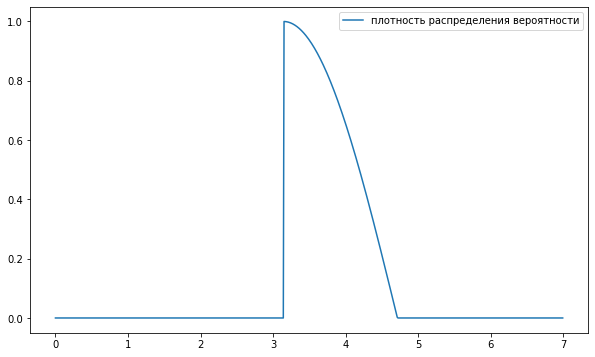

In [30]:
#4
#1)
import math as mt
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,7,0.01)
def f(x):
  if x>mt.pi and x<=(mt.pi*1.5): y=-1*mt.cos(x)
  else: y=0
  return y
y=list(map(f,x))

plt.figure(figsize = (10, 6))
plt.plot(x, y, label='плотность распределения вероятности')
plt.legend()
plt.show()

#2) для определения вероятности попадания нужно взять определенный интеграл от функции на отрезке [pi;5pi/4]: integrate -cos(x) dx from x=pi to 5pi/4 = 0.70711
#3) M = integrate -x*cos(x) dx from x=pi to 3pi/2 = 3.7124
#D = integrate -x^2*cos(x) dx from x=pi to 3pi/2 - 3.7124^2 = 13.923 - 13.781 = 0.141

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


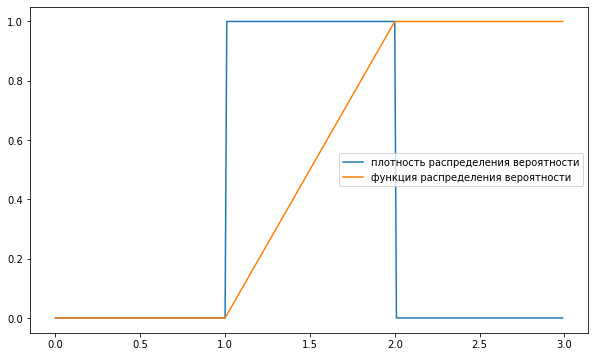

In [26]:
#5
#1) Да, функция непрерывна
#2) Да, f(x) = F'(x) => f(x) = 1, x in (1;2]; f(x) = 0, x not in (1;2]
import matplotlib.pyplot as plt
import numpy as np
def F(x):
  if x<=1: y=0 #не могу понять в чем затык
  elif x>1 and x<=2: y=x-1
  else: y=1
  return y
def f(x):
  if x<=1: y=0
  elif x>1 and x<=2: y=1
  else: y=0
  return y

x = np.arange(0,3,0.01)
y1=list(map(F,x))
y2=list(map(f,x))

plt.figure(figsize = (10, 6))
plt.plot(x, y2, label='плотность распределения вероятности')
plt.plot(x, y1, label='функция распределения вероятности')
plt.legend()
plt.show()


### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [ ]:
#6
TP = 90
FP = 30
FN = 100-90
precission = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = (2*precission*recall)/(precission+recall)
print('precission: {}\nrecall: {}\nF1: {}'.format(precission,recall,F1))

precission: 0.75
recall: 0.9
F1: 0.8181818181818182
